In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from typing import List
import time
import random

In [57]:
class Solution:
    
    def __init__(self):
        self.df = None

    def hybrid_sort(self, threshold: int, arr: List[int]):
        if len(arr) >= threshold:
            A = arr[:len(arr)//2]
            B = arr[len(arr)//2:]

            L = self.hybrid_sort(threshold, A)
            R = self.hybrid_sort(threshold, B)
            
            return self.merge(L, R)
        
        elif len(arr) < threshold and len(arr) > 1:
            return self.insertion_sort(arr)
        
        else:
            return arr

    def merge(self, A: List[int], B: List[int]):
        i = 0
        j = 0
        k = 0
        C = []
        
        while i<len(A) and j<len(B):
            if A[i] > B[j]:
                C.append(B[j])
                j+=1
            elif A[i] < B[j]:
                C.append(A[i])
                i+=1
            elif A[i] == B[j]:
                C.append(A[i])
                i+=1
            k+=1
            
        while i<len(A):
            C.append(A[i])
            i+=1
            k+=1
        
        while j<len(B):
            C.append(B[j])
            j+=1
            k+=1
            
        return C
    
    def insertion_sort(self, arr: List[int]):

        for i in range(1, len(arr)):
            key = arr[i]
            j = i-1

            while j>=0 and key<arr[j]:
                arr[j+1] = arr[j]
                j-=1

            arr[j+1] = key
        return arr

    @staticmethod
    def random_array_generator(arr_len: int):
        random_list = []
        for i in range(0,arr_len):
            n = random.randint(1,1000)
            random_list.append(n)
        return random_list
    
    def get_best_case_arr(self, arr_len: List[int]):
        return [n for n in range(10000)]
    
    def get_worse_case_arr(self, arr_len: List[int]):
        return [n for n in range(10000, 0, -1)]
    
    def get_threshold(self, start: int, end: int, step: int):
        return [n for n in range(start, end, step)]
    
    def get_dataframe(self):
        return self.df
    
    def set_dataframe(self, thresholds: int, timings: int):
        self.df = pd.DataFrame({'thresholds': thresholds, 'CPU timing': timings})
    
    def plot_graph(self):
        plt.figure(figsize=(10,8), dpi=80)
        plt.xlabel('Thresholds')
        plt.ylabel('CPU timing')
        plt.plot( 'thresholds', 'CPU timing', data=self.df, linestyle='-', marker='o')
        plt.show()
        
        
    def execute(self, ori_arr):
        timings = []
        thresholds = self.get_threshold(2, 100, 1)

        for threshold in thresholds:
            start_time = time.time()
            tm = []
            for i in range(0, 20):
                sorted_arr = self.hybrid_sort(threshold, ori_arr)
                timing = time.time() - start_time
                tm.append(timing)
            avg_timing = sum(tm) / len(tm)
            timings.append(avg_timing)
        self.set_dataframe(thresholds, timings)

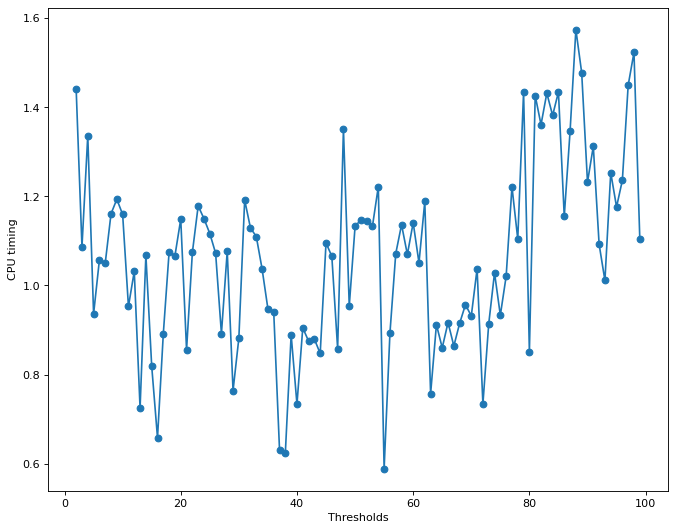

In [58]:
sol = Solution()
ori_arr = Solution.random_array_generator(10000)
sol.execute(ori_arr)
sol.plot_graph()

In [59]:
df = sol.get_dataframe()
df

,thresholds,CPU timing
0,2,1.440828
1,3,1.086775
2,4,1.336006
3,5,0.936004
4,6,1.057054
...,...,...
93,95,1.176146
94,96,1.235800
95,97,1.448812
96,98,1.522659


In [61]:
df[df['CPU timing'] == df['CPU timing'].min()]

,thresholds,CPU timing
53,55,0.588763
